In [111]:
import pandas as pd
import plotly.express as px
from functools import reduce
import seaborn as sns

In [63]:
home_page = pd.read_csv(r'C:\Users\SKRIPLAN\Desktop\funnel\home_page_table.csv')
payment_confirmation = pd.read_csv(r'C:\Users\SKRIPLAN\Desktop\funnel\payment_confirmation_table.csv')
payment_page = pd.read_csv(r'C:\Users\SKRIPLAN\Desktop\funnel\payment_page_table.csv')
search_page = pd.read_csv(r'C:\Users\SKRIPLAN\Desktop\funnel\search_page_table.csv')
user = pd.read_csv(r'C:\Users\SKRIPLAN\Desktop\funnel\user_table.csv')

In [64]:
home_page['page'] = 'Yes'
home_page = home_page.rename(columns = {"page": "home_page_visited?"})

payment_page['page'] = 'Yes'
payment_page = payment_page.rename(columns = {"page": "payment_page_visited?"})

payment_confirmation['page'] = 'Yes'
payment_confirmation = payment_confirmation.rename(columns = {"page": "payment_confirmed?"})

search_page['page'] = 'Yes'
search_page = search_page.rename(columns = {"page": "search_page_visited?"})

In [71]:
pages = ["Home Page", "Search Page", "Payment Page", "Confirmation Page"]
df = dict(visits=[len(home_page), len(search_page), len(payment_page), len(payment_confirmation)], stage=pages)

In [72]:
fig = px.funnel(df, x='visits', y='stage')
fig.show()

# as we can see, 90k people land up on the homepage but out of them just 452 go to the confirmation page. Sales are really low, 
# conversion is just 0.5% overall

In [52]:
df_list = [search_page, payment_page, payment_confirmation, user, home_page]
data = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'], how='outer'), df_list).fillna('No')
data

,user_id,search_page_visited?,payment_page_visited?,payment_confirmed?,date,device,sex,home_page_visited?
0,15866,Yes,No,No,2015-03-15,Desktop,Male,Yes
1,347058,Yes,No,No,2015-03-22,Desktop,Male,Yes
2,577020,Yes,No,No,2015-04-29,Mobile,Male,Yes
3,780347,Yes,No,No,2015-03-14,Desktop,Female,Yes
4,383739,Yes,No,No,2015-03-20,Desktop,Male,Yes
...,...,...,...,...,...,...,...,...
90395,933961,No,No,No,2015-04-13,Mobile,Female,Yes
90396,352574,No,No,No,2015-02-23,Desktop,Female,Yes
90397,307667,No,No,No,2015-03-30,Desktop,Female,Yes
90398,359779,No,No,No,2015-03-23,Desktop,Male,Yes


In [85]:
data_desktop = data[data.device=='Desktop']
pages = ['Home Page', 'Search Page', 'Payment Page', 'Payment Confirmation Page']

numbers = [len([i for i in data_desktop['home_page_visited?'] if i == 'Yes']), 
           len([i for i in data_desktop['search_page_visited?'] if i == 'Yes']),
           len([i for i in data_desktop['payment_page_visited?'] if i == 'Yes']),
           len([i for i in data_desktop['payment_confirmed?'] if i == 'Yes'])]
desktop = pd.DataFrame(dict(number=numbers, stage=pages))
desktop['device'] = 'Desktop'

data_mobile = data[data.device=='Mobile']
numbers = [len([i for i in data_mobile['home_page_visited?'] if i == 'Yes']), 
           len([i for i in data_mobile['search_page_visited?'] if i == 'Yes']),
           len([i for i in data_mobile['payment_page_visited?'] if i == 'Yes']),
           len([i for i in data_mobile['payment_confirmed?'] if i == 'Yes'])]
mobile = pd.DataFrame(dict(number=numbers, stage=pages))
mobile['device'] = 'Mobile'

df = pd.concat([desktop, mobile], axis=0)
fig = px.funnel(df, x='number', y='stage', color='device')
fig.show()

# Lot of insights can be drawn from here:
# Homepage gets almost double the visitors on Dekstop than on Mobile. Same for Search Page. 
# Number of people who go to the Payment Page does not change if the visitor is using a desktop or a mobile
# Only 10% of those who go to the payment page when using their mobiles go ahead and actually do the payment
# Only 5% of those who go to the payment page when using their desktops go ahead and actually do the payment
# Thus those who visit the website and end up paying using their mobiles are double of those who do the same using their desktop

In [140]:
data_male = data[data.sex=='Male']
pages = ['Home Page', 'Search Page', 'Payment Page', 'Payment Confirmation Page']

numbers = [len([i for i in data_male['home_page_visited?'] if i == 'Yes']), 
           len([i for i in data_male['search_page_visited?'] if i == 'Yes']),
           len([i for i in data_male['payment_page_visited?'] if i == 'Yes']),
           len([i for i in data_male['payment_confirmed?'] if i == 'Yes'])]
male = pd.DataFrame(dict(number=numbers, stage=pages))
male['gender'] = 'Male'

data_female = data[data.sex=='Female']
numbers = [len([i for i in data_female['home_page_visited?'] if i == 'Yes']), 
           len([i for i in data_female['search_page_visited?'] if i == 'Yes']),
           len([i for i in data_female['payment_page_visited?'] if i == 'Yes']),
           len([i for i in data_female['payment_confirmed?'] if i == 'Yes'])]
female = pd.DataFrame(dict(number=numbers, stage=pages))
female['gender'] = 'Female'

df = pd.concat([male, female], axis=0)
fig = px.funnel(df, x='number', y='stage', color='gender')
fig.show()

# there is not much to draw in terms of relative comparison when it comes to the gender of the visitor since the visiting 
# population is composed of equal ratio of both the genders

In [120]:
# Click through rates:
# For Search Page:
ct_total_search = round(len(search_page)/len(home_page), 2)
ct_desktop_search = round(
    list(data['search_page_visited?'][data.device == 'Desktop']).count('Yes')/
    list(data['home_page_visited?'][data.device == 'Desktop']).count('Yes'), 2)
ct_mobile_search = round(
    list(data['search_page_visited?'][data.device == 'Mobile']).count('Yes')/
    list(data['home_page_visited?'][data.device == 'Mobile']).count('Yes'), 2)

# For Payment Page:
ct_total_payment = round(len(payment_page)/len(search_page), 2)
ct_desktop_payment = round(
    list(data['payment_page_visited?'][data.device == 'Desktop']).count('Yes')/
    list(data['search_page_visited?'][data.device == 'Desktop']).count('Yes'), 2)
ct_mobile_payment = round(
    list(data['payment_page_visited?'][data.device == 'Mobile']).count('Yes')/
    list(data['search_page_visited?'][data.device == 'Mobile']).count('Yes'), 2)

# For Payment Confirmation Page:
ct_total_payment_confirmed = round(len(payment_confirmation)/len(payment_page), 2)
ct_desktop_payment_confirmed = round(
    list(data['payment_confirmed?'][data.device == 'Desktop']).count('Yes')/
    list(data['payment_page_visited?'][data.device == 'Desktop']).count('Yes'), 2)
ct_mobile_payment_confirmed = round(
    list(data['payment_confirmed?'][data.device == 'Mobile']).count('Yes')/
    list(data['payment_page_visited?'][data.device == 'Mobile']).count('Yes'), 2)

In [132]:
dataset = {'Stage': ['Search Page', 'Search Page', 'Search Page', 'Payment Page', 'Payment Page', 'Payment Page', 'Payment Confirmation', 'Payment Confirmation', 'Payment Confirmation'],
        'Device': ['Total', 'Desktop', 'Mobile', 'Total', 'Desktop', 'Mobile','Total', 'Desktop', 'Mobile'],
        'Clickthrough Rate': [ct_total_search, ct_desktop_search, ct_mobile_search,
                      ct_total_payment, ct_desktop_payment, ct_mobile_payment,
                      ct_total_payment_confirmed, ct_desktop_payment_confirmed, ct_mobile_payment_confirmed]}
dataset = pd.DataFrame(dataset)
dataset

,Stage,Device,Clickthrough Rate
0,Search Page,Total,0.50
1,Search Page,Desktop,0.50
2,Search Page,Mobile,0.50
3,Payment Page,Total,0.13
4,Payment Page,Desktop,0.10
5,Payment Page,Mobile,0.20
6,Payment Confirmation,Total,0.07
7,Payment Confirmation,Desktop,0.05
8,Payment Confirmation,Mobile,0.10


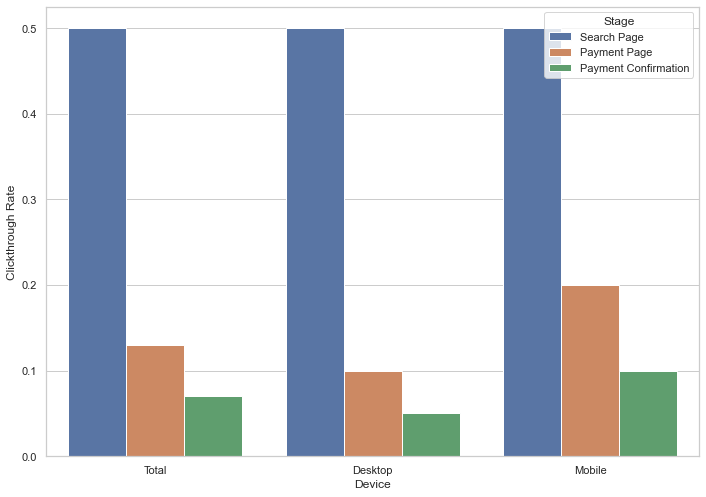

In [133]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
dataset['Clickthrough Rate'] = dataset['Clickthrough Rate']
ax = sns.barplot(x="Device", y="Clickthrough Rate", hue="Stage", data=dataset)

In [134]:
# the conclusions that can be drawn from the above visualization is similar to what we got from drawing the funnel to understand 
# the conversion rates. 

# Here is the final story:
# If 100 people visit the website using their mobile phones, then 200 do the same but using their desktop. Same relative trend 
# is there when the visitor goes to the search page. But the numbers go down, only 50% of visitors go to the search page. That is 
# issue #1: Only 50% of people go to search page after landing on home page

# Once people are on the search page, there is a huge drop in the number of desktop users who go to the payments page; such that
# the number of visitors who are using dekstop or mobile to reach the payment page is the same. Why is this drop there? That is 
# issue #2: for every 2 mobile user who goes to the payment page only 1 desktop user goes to the payment page

# Double the number of mobile using visitors finish the payment than desktop using visitors. Why is that?
# Issue #3: for every 2 mobile user who makes the payment only 1 desktop does the same. 

In [ ]:
# Ideas to improve conversion rate:

# SEARCH PAGE: Possible reasons for the issue: Loading time could be high, but the website seems to be working same on both the 
# devices, atleast till the search page. Product team could do well with website optimization, or consulting experts to improve
# loading time. 

# PAYMENT PAGE: Possibly, desktop payment has less payment options? Offering more payment options, offering sudden discounts or
# coupons right before landing on the payment page might increase conversion. Combo offers based on what they have already added
# to their cart can also persuade them to go to the payment page. 

# PAYMENT CONFIRMATION: most likely, double the mobile users do the payment than the desktop users because of possible security 
# issue: absence of security certificate might make them hesitant. Adding a security certificate will likely prevent them from
# stopping the payment

# Additionally, we can also add mid stage surveys to ask users exactly why they want to not continue, at a point when they want 
# to stop. 